In [1]:
import pandas as pd
import plotly.express as px

import xgboost as xgb
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

pd.options.plotting.backend = "plotly"

In [2]:
df = pd.read_excel("output.xlsx")
df.index = pd.to_datetime(df['Unnamed: 0'])
df.drop('Unnamed: 0', axis=1, inplace=True)
df.index.names = ['Date']
df

Consommation (kWh)
Date                                   
2019-05-10 00:00:00               16.34
2019-05-10 01:00:00               19.00
2019-05-10 02:00:00               24.17
2019-05-10 03:00:00               19.17
2019-05-10 04:00:00               19.34
...                                 ...
2022-11-20 20:00:00               11.67
2022-11-20 21:00:00               12.17
2022-11-20 22:00:00               11.00
2022-11-20 23:00:00               12.50
2022-11-21 00:00:00                2.00

[30982 rows x 1 columns]

In [4]:
df.plot()

In [7]:
df = pd.read_excel('dataset2.xlsx')
df.index = pd.to_datetime(df['Date'])
df.drop('Date', axis=1, inplace=True)
df

Consommation (kWh)  Equivalent (kWh-euro  \
Date                                                            
2019-05-10 00:00:00               16.34              2.651982   
2019-05-10 01:00:00               19.00              3.083700   
2019-05-10 02:00:00               24.17              3.922791   
2019-05-10 03:00:00               19.17              3.111291   
2019-05-10 04:00:00               19.34              3.138882   
...                                 ...                   ...   
2022-11-20 20:00:00               11.67              1.894041   
2022-11-20 21:00:00               12.17              1.975191   
2022-11-20 22:00:00               11.00              1.785300   
2022-11-20 23:00:00               12.50              2.028750   
2022-11-21 00:00:00                2.00              0.324600   

                     Consommation (gaz)  Equivalent (gaz-euro)  \
Date                                                             
2019-05-10 00:00:00            5.991715               0.739378   
2019-05-10 01:00:00            6.967110               0.859741   
2019-05-10 02:00:00            8.862897               1.093682   
2019-05-10 03:00:00            7.029447               0.867434   
2019-05-10 04:00:00            7.091785               0.875126   
...                                 ...                    ...   
2022-11-20 20:00:00            4.279272               0.528062   
2022-11-20 21:00:00            4.462617               0.550687   
2022-11-20 22:00:00            4.033590               0.497745   
2022-11-20 23:00:00            4.583625               0.565619   
2022-11-21 00:00:00            0.733380               0.090499   

                     Consommation (eau)  Equivalent (eau-euro)  \
Date                                                             
2019-05-10 00:00:00            1.597930               0.159937   
2019-05-10 01:00:00            1.858059               0.185973   
2019-05-10 02:00:00            2.363646               0.236577   
2019-05-10 03:00:00            1.874683               0.187637   
2019-05-10 04:00:00            1.891308               0.189301   
...                                 ...                    ...   
2022-11-20 20:00:00            1.141239               0.114227   
2022-11-20 21:00:00            1.190135               0.119121   
2022-11-20 22:00:00            1.075718               0.107669   
2022-11-20 23:00:00            1.222407               0.122351   
2022-11-21 00:00:00            0.195585               0.019576   

                     Equivalent (kWh-euro)  year  month  Emission Co2e  \
Date                                                                     
2019-05-10 00:00:00               2.651982  2019      5       0.017760   
2019-05-10 01:00:00               3.083700  2019      5       0.031260   
2019-05-10 02:00:00               3.922791  2019      5       0.010095   
2019-05-10 03:00:00               3.111291  2019      5       0.010333   
2019-05-10 04:00:00               3.138882  2019      5       0.014024   
...                                    ...   ...    ...            ...   
2022-11-20 20:00:00               1.894041  2022     11       0.032453   
2022-11-20 21:00:00               1.975191  2022     11       0.021819   
2022-11-20 22:00:00               1.785300  2022     11       0.019331   
2022-11-20 23:00:00               2.028750  2022     11       0.026369   
2022-11-21 00:00:00               0.324600  2022     11       0.034739   

                     Emission Co2e_2  
Date                                  
2019-05-10 00:00:00         0.017760  
2019-05-10 01:00:00         0.031260  
2019-05-10 02:00:00         0.010095  
2019-05-10 03:00:00         0.010333  
2019-05-10 04:00:00         0.014024  
...                              ...  
2022-11-20 20:00:00         0.032453  
2022-11-20 21:00:00         0.021819  
2022-11-20 22:00:00         0.019331  
2022-11-20 23:00:00         0.026369  
2022-11-21 00:00:00       

In [8]:
# Graph 1
values = [df['Consommation (kWh)'].sum(), df['Consommation (eau)'].sum(), df['Consommation (gaz)'].sum()]
names = ['Consommation (kWh)', 'Consommation (eau)', 'Consommation (gaz)']
fig = px.pie(df, values=values , names=names,title=' Distribution des différentes consommations énergétique' ,color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

In [4]:
df_model_ = pd.DataFrame(df['Consommation (kWh)'])
df_model_

Consommation (kWh)
Date                                   
2019-05-10 00:00:00               16.34
2019-05-10 01:00:00               19.00
2019-05-10 02:00:00               24.17
2019-05-10 03:00:00               19.17
2019-05-10 04:00:00               19.34
...                                 ...
2022-11-20 20:00:00               11.67
2022-11-20 21:00:00               12.17
2022-11-20 22:00:00               11.00
2022-11-20 23:00:00               12.50
2022-11-21 00:00:00                2.00

[30982 rows x 1 columns]

In [5]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df_model = create_features(df_model_)

In [6]:
df_model

Consommation (kWh)  hour  dayofweek  quarter  month  \
Date                                                                       
2019-05-10 00:00:00               16.34     0          4        2      5   
2019-05-10 01:00:00               19.00     1          4        2      5   
2019-05-10 02:00:00               24.17     2          4        2      5   
2019-05-10 03:00:00               19.17     3          4        2      5   
2019-05-10 04:00:00               19.34     4          4        2      5   
...                                 ...   ...        ...      ...    ...   
2022-11-20 20:00:00               11.67    20          6        4     11   
2022-11-20 21:00:00               12.17    21          6        4     11   
2022-11-20 22:00:00               11.00    22          6        4     11   
2022-11-20 23:00:00               12.50    23          6        4     11   
2022-11-21 00:00:00                2.00     0          0        4     11   

                     year  dayofyear  dayofmonth  weekofyear  
Date                                                          
2019-05-10 00:00:00  2019        130          10          19  
2019-05-10 01:00:00  2019        130          10          19  
2019-05-10 02:00:00  2019        130          10          19  
2019-05-10 03:00:00  2019        130          10          19  
2019-05-10 04:00:00  2019        130          10          19  
...                   ...        ...         ...         ...  
2022-11-20 20:00:00  2022        324          20          46  
2022-11-20 21:00:00  2022        324          20          46  
2022-11-20 22:00:00  2022        324          20          46  
2022-11-20 23:00:00  2022        324          20          46  
2022-11-21 00:00:00  2022        325          21          47  

[30982 rows x 9 columns]

In [7]:
df['Consommation (kWh)'].plot()

In [8]:
train = df_model.loc[:'2022-08']
test = df.loc['2022-09']

In [9]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'Consommation (kWh)'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [10]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[13:36:53] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[13:36:53] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:32.61112	validation_1-rmse:24.95992
[100]	validation_0-rmse:15.79377	validation_1-rmse:9.51242
[200]	validation_0-rmse:10.04958	validation_1-rmse:4.68939
[300]	validation_0-rmse:8.15574	validation_1-rmse:3.62531
[400]	validation_0-rmse:7.52073	validation_1-rmse:3.31864
[500]	validation_0-rmse:7.17955	validation_1-rmse:3.20970
[600]	validation_0-rmse:6.99141	validation_1-rmse:3.28160
[700]	validation_0-rmse:6.8

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=50,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=16,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [11]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

Text(0.5, 1.0, 'True Data and Prediction')

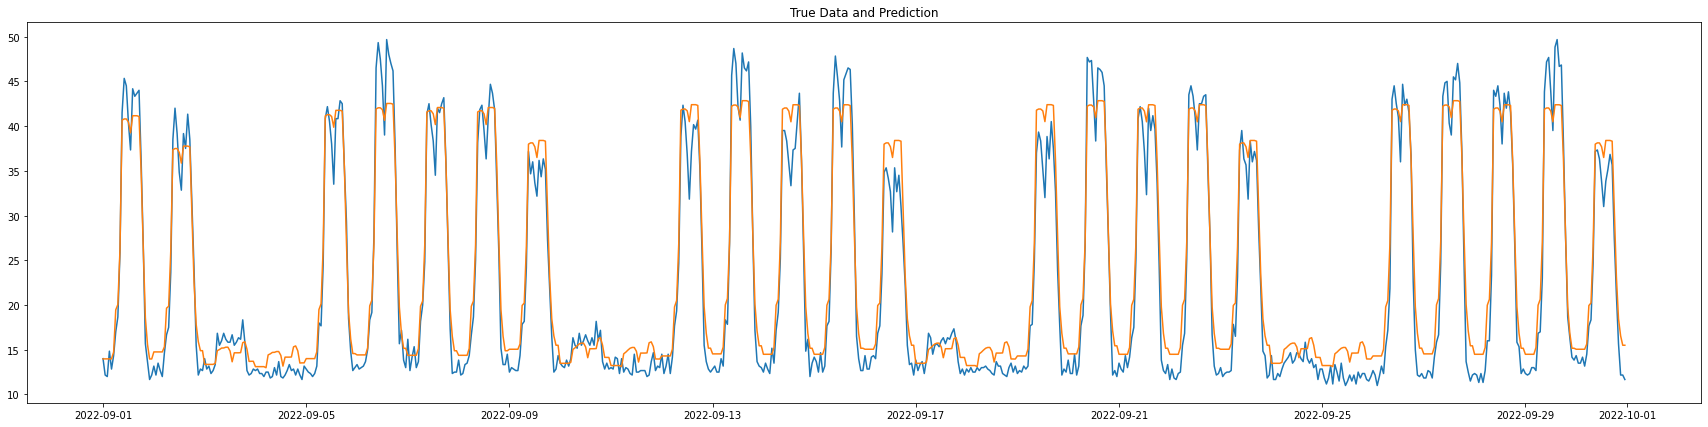

In [12]:
plt.figure(figsize=(30,7))

plt.plot(test['Consommation (kWh)'])
plt.plot(df['prediction'].loc['2022-09'])

plt.title('True Data and Prediction')

In [16]:
test = pd.DataFrame(test['Consommation (kWh)'])
test

Consommation (kWh)
Date                                   
2022-09-01 00:00:00               14.00
2022-09-01 01:00:00               12.17
2022-09-01 02:00:00               12.00
2022-09-01 03:00:00               14.84
2022-09-01 04:00:00               12.84
...                                 ...
2022-09-30 19:00:00               21.17
2022-09-30 20:00:00               15.67
2022-09-30 21:00:00               12.17
2022-09-30 22:00:00               12.17
2022-09-30 23:00:00               11.67

[720 rows x 1 columns]

In [18]:
predictions = pd.DataFrame(df['prediction'].loc['2022-09'])
predictions

prediction
Date                           
2022-09-01 00:00:00   13.977115
2022-09-01 01:00:00   13.977115
2022-09-01 02:00:00   13.977115
2022-09-01 03:00:00   13.977115
2022-09-01 04:00:00   13.977115
...                         ...
2022-09-30 19:00:00   23.161654
2022-09-30 20:00:00   18.459488
2022-09-30 21:00:00   16.547009
2022-09-30 22:00:00   15.500555
2022-09-30 23:00:00   15.500555

[720 rows x 1 columns]

In [20]:
df_final = test.join(predictions)
df_final

Consommation (kWh)  prediction
Date                                               
2022-09-01 00:00:00               14.00   13.977115
2022-09-01 01:00:00               12.17   13.977115
2022-09-01 02:00:00               12.00   13.977115
2022-09-01 03:00:00               14.84   13.977115
2022-09-01 04:00:00               12.84   13.977115
...                                 ...         ...
2022-09-30 19:00:00               21.17   23.161654
2022-09-30 20:00:00               15.67   18.459488
2022-09-30 21:00:00               12.17   16.547009
2022-09-30 22:00:00               12.17   15.500555
2022-09-30 23:00:00               11.67   15.500555

[720 rows x 2 columns]

In [21]:
df_final.to_excel('test_pred.xlsx')

In [8]:
df.plot()

In [3]:
df_opti = df.loc['2022-02-21':'2022-02-27']
df_opti.plot()

In [23]:
df_opti = pd.read_excel('opti_example_dataset.xlsx')
df_opti.index = pd.to_datetime(df_opti['Date'])
df_opti.drop('Date', axis=1, inplace=True)
df_opti

Consommation (kWh)  Sans optimisation  Avec optimisation
Date                                                                         
2022-02-21 00:00:00               14.50                 80                 23
2022-02-21 01:00:00               12.67                 80                 23
2022-02-21 02:00:00               13.50                 80                 23
2022-02-21 03:00:00               13.00                 80                 23
2022-02-21 04:00:00               13.50                 80                 23
...                                 ...                ...                ...
2022-02-27 19:00:00               16.17                 80                 23
2022-02-27 20:00:00               16.84                 80                 23
2022-02-27 21:00:00               15.84                 80                 23
2022-02-27 22:00:00               17.50                 80                 23
2022-02-27 23:00:00               17.67                 80                 23

[168 rows x 3 columns]

In [29]:
fig = px.line(df_opti[['Consommation (kWh)', 'Sans optimisation']], title='Contrat avant optimisation',\
     range_x = ['2022-02-21','2022-02-28'], range_y=[0,85])
fig.show()

In [30]:
fig = px.line(df_opti[['Consommation (kWh)', 'Avec optimisation']], title='Contrat après optimisation',\
     range_x = ['2022-02-21','2022-02-28'], range_y=[0,60])
fig.show()